In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
dataset = pd.read_csv("data.csv")
dataset.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [8]:
dataset.shape

(4600, 18)

In [9]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   str    
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   str    
 15  city           4600 non-null   str    
 16  statezip       4600 non-null   str    
 17  country        4600 non-null   str    
dtypes: float64(4), int6

In [11]:
# sns.pairplot(data=dataset)
# plt.show()

droping useless feature

In [12]:
dataset.isnull().sum().sort_values(ascending=False).head(10)


date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
dtype: int64

encoding

In [13]:
object_data = dataset.select_dtypes(include=['object'])
object_data


C:\Users\Arvind kumar\AppData\Local\Temp\ipykernel_8752\2689253233.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  object_data = dataset.select_dtypes(include=['object'])


,date,street,city,statezip,country
0,2014-05-02 00:00:00,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...
4595,2014-07-09 00:00:00,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,5148 S Creston St,Seattle,WA 98178,USA


In [15]:
dataset["date"].value_counts()


date
2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-05-11 00:00:00      2
2014-07-04 00:00:00      2
2014-05-17 00:00:00      1
Name: count, Length: 70, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
    
for column in dataset.select_dtypes(include=['object']).columns:
    dataset[column] = le.fit_transform(dataset[column])

C:\Users\Arvind kumar\AppData\Local\Temp\ipykernel_8752\1727370253.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for column in dataset.select_dtypes(include=['object']).columns:


In [17]:
# if want to convert int32 to int64

# dataset = dataset.astype({col: 'int64' for col in dataset.select_dtypes(include='int32').columns})

scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = dataset.select_dtypes(include=['float64', 'int64', 'int32']).columns

dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

In [19]:
dataset.head(5)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,-1.833713,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,-0.568577,0.861805,1.111825,0.0
1,-1.833713,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,1.249466,0.778343,0.920595,0.0
2,-1.833713,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,0.019591,-0.640521,-0.609244,0.0
3,-1.833713,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,1.527871,-1.892459,-1.517585,0.0
4,-1.833713,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,1.595942,0.444493,-0.370206,0.0


Outlier


In [20]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset = dataset[~((dataset < lower_bound) | (dataset > upper_bound)).any(axis=1)]

In [21]:
dataset.shape

# (96432, 25) previus shape of dataset

(3447, 18)

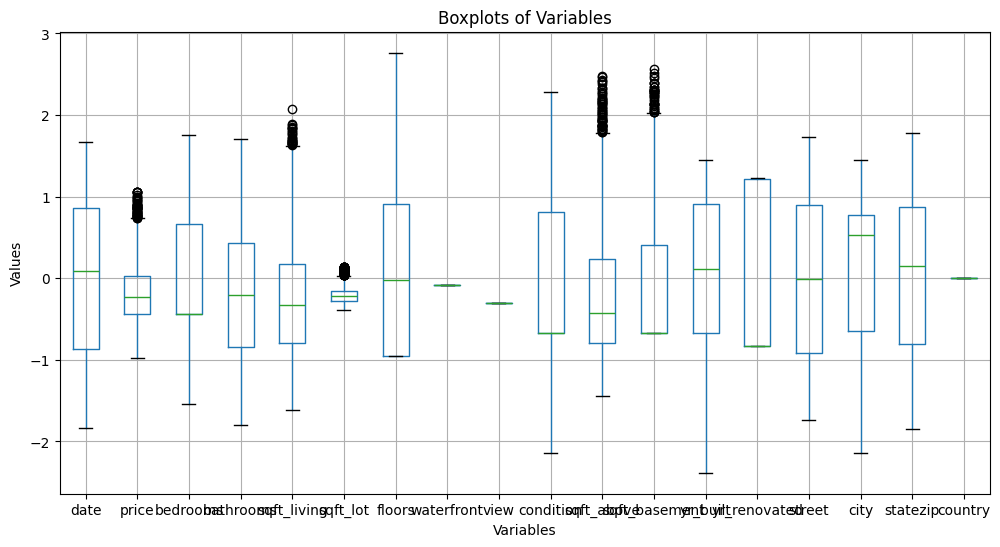

In [22]:
#finding outliers
fig, ax = plt.subplots(figsize=(12, 6))
dataset.boxplot(ax=ax)

# Customize the plot
ax.set_title('Boxplots of Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Values')
plt.show()

Feature selection

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

a = dataset.drop(columns=['price'])  # Drop the target column
b = dataset['price']

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=42)

model = LinearRegression()

In [29]:
from mlxtend.feature_selection import SequentialFeatureSelector

fs = SequentialFeatureSelector(model, k_features=8,forward=True) # change feature for getting accuracy value 
fs.fit(a,b)

selected_features = fs.k_feature_names_
print(f"Selected features: {selected_features}")

selected_indices = fs.k_feature_idx_
print(f"Selected feature indices: {selected_indices}")

Selected features: ('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'city', 'statezip')
Selected feature indices: (1, 2, 3, 4, 5, 11, 14, 15)


In [30]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=model, n_features_to_select=9)

rfe.fit(a_train, b_train)

selected_features = a_train.columns[rfe.support_]

selected_features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'city', 'statezip'],
      dtype='str')

find corelation between features

In [31]:
correlation_matrix = dataset.corr()


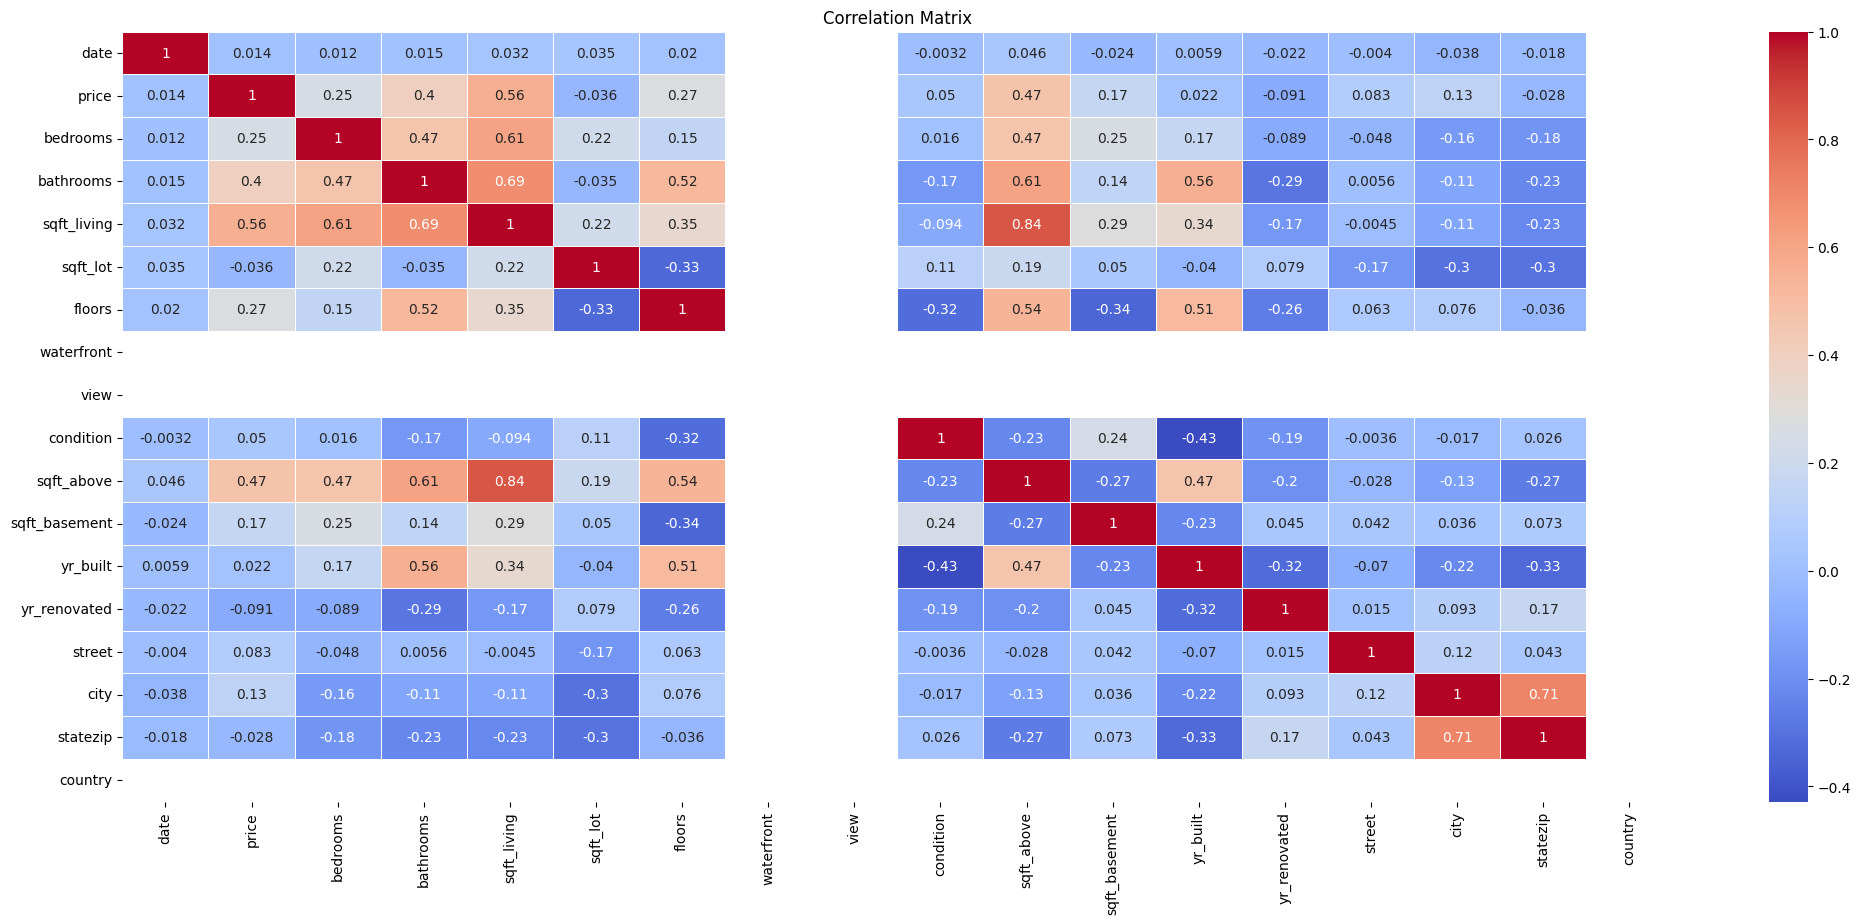

In [32]:
#  Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

breakdown dataset

In [34]:
# x = dataset.drop(columns=['maxtempC', 'windspeedKmph'])
# y = dataset[['maxtempC', 'windspeedKmph']]

# x = dataset.drop(columns=['windspeedKmph'])
# y = dataset['windspeedKmph']

x = dataset.drop(columns=['price'])
y = dataset['price']

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.2205364635404839
RMSE: 0.2850347335344316
R² Score: 0.40262998316556287


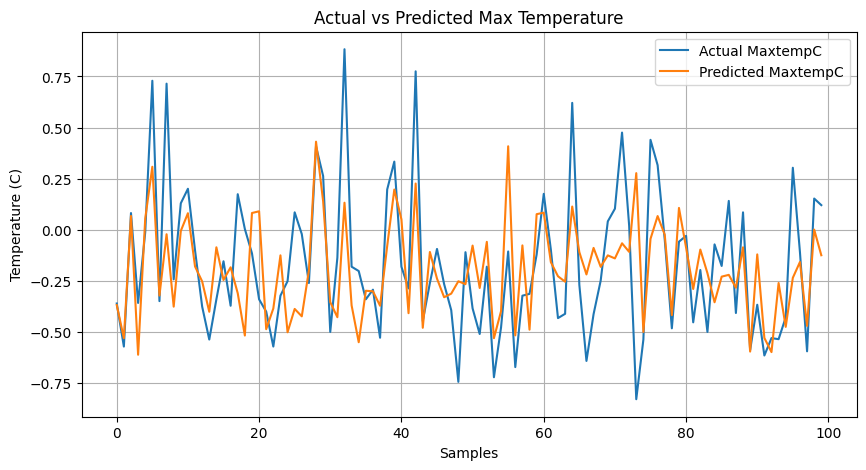

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual MaxtempC')
plt.plot(y_pred[:100], label='Predicted MaxtempC')
plt.legend()
plt.title("Actual vs Predicted Max Temperature")
plt.xlabel("Samples")
plt.ylabel("Temperature (C)")
plt.grid()
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

lr.score(x_test, y_test)*100, lr.score(x_train, y_train)*100, lr.score(x, y)*100

# (78.23573622220769, 78.45570384679002) 

(40.262998316556285, 44.49686531776166, 43.42146183901495)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

train_predictions = lr.predict(x_train)
test_predictions = lr.predict(x_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training MSE: {train_mse:.2f}, R^2: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.2f}, R^2: {test_r2:.4f}")

Training MSE: 0.07, R^2: 0.4450
Testing MSE: 0.08, R^2: 0.4026


KNeighborsRegressor



In [42]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=4)
knr.fit(x_train, y_train)

knr.score(x_test, y_test)*100 , knr.score(x_train, y_train)*100

(38.4790852497089, 63.07128039742585)

MLPRegressor

In [43]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(solver='adam', alpha=0.001, hidden_layer_sizes=(7, 5,), random_state=10)

mlp.fit(x_train, y_train)

mlp.score(x_test, y_test)*100, mlp.score(x_train, y_train)*100

(34.22996298832393, 39.80490448976761)

droping useless feature

In [44]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=10)
rfc.fit(x_train, y_train)

rfc.score(x_test, y_test)*100  , rfc.score(x_train, y_train)*100

(63.795979761576426, 93.37455766234011)

VotingRegressor


In [45]:
# from sklearn.ensemble import VotingRegressor

# li = [("lr1", LinearRegression()), (("rf1"), RandomForestRegressor()), (("mlp1"), MLPRegressor())]

# vr = VotingRegressor(li)
# vr.fit(x_train, y_train)

# vr.score(x_test, y_test)*100  , vr.score(x_train, y_train)*100

DecisionTreeRegressor

In [46]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

dt.score(x_test, y_test)*100 , dt.score(x_train, y_train)*100

(32.11866813551257, 100.0)

In [47]:
# plt.figure(figsize=(12, 8))

# plot_tree(pd)
# plt.show()

SVR


In [48]:
# from sklearn.svm import SVR

# sr = SVR(kernel="linear")
# sr.fit(x_train, y_train)

# sr.score(x_test, y_test)*100, sr.score(x_train, y_train)*100

evaluation metrics
lr

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)*100
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)*100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 22.05
Mean Squared Error (MSE): 8.12
Root Mean Squared Error (RMSE): 2.85
R² Score: 40.26


prediction


In [50]:
dataset.shape

(3447, 18)

In [51]:
dataset.columns.tolist()


['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

In [53]:
dataset.reset_index(drop=True, inplace=True)

columns_of_interest = ['date', 'price', 'bedrooms', 'city', 'country']

# Get the first row values for the specified columns
first_row_values = dataset.loc [0][columns_of_interest]

print(first_row_values)

date       -1.833713
price      -0.423864
bedrooms   -0.441122
city        0.861805
country     0.000000
Name: 0, dtype: float64


In [68]:
import pandas as pd

new_raw = pd.DataFrame([{
    "date": "2014-05-02 00:00:00",
    "bedrooms": 3.0,
    "bathrooms": 1.5,
    "sqft_living": 1340,
    "sqft_lot": 7912,
    "floors": 1.5,
    "waterfront": 0,
    "view": 0,
    "condition": 3,
    "sqft_above": 1340,
    "sqft_basement": 0,
    "yr_built": 1955,
    "yr_renovated": 2005,
    "street": "18810 Densmore Ave N",
    "city": "Shoreline",
    "statezip": "WA 98133",
    "country": "USA"
}])


In [69]:
new_raw['date'] = pd.to_datetime(new_raw['date'])
new_raw['year'] = new_raw['date'].dt.year
new_raw['month'] = new_raw['date'].dt.month
new_raw['day'] = new_raw['date'].dt.day

new_raw.drop(columns=['date'], inplace=True)


In [71]:
new_encoded = pd.get_dummies(new_raw, drop_first=True)

# X = training features (jo model train karte waqt use hua tha)
new_encoded = new_encoded.reindex(columns=x.columns, fill_value=0)



In [72]:
predicted_price = model.predict(new_encoded)
print("🏠 Predicted House Price:", int(predicted_price[0]))


🏠 Predicted House Price: -152


c:\Users\Arvind kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
